In [1]:
import pandas as pd
import numpy as np
import json

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

## Mietpreis Verteilung

In [2]:
dresden = pd.read_csv('2020-05-28-Sachsen-Dresden-Wohnung-Miete.csv', skiprows=1)
dresden = dresden[dresden['EUR/qm']>2]
dresden.head()

,ID,Haus/Wohnung,ID.1,Miete/Kauf,address,balcony,builtInKitchen,city,floorplan,from,...,livingSpace,lon,numberOfRooms,postcode,price,privateOffer,quarter,title,url,EUR/qm
3,118391829,Wohnung,118391829,Miete,"Wölfnitzer Ring 2, Gorbitz-Süd, Dresden",True,False,Dresden,True,002.01008611707,...,72.58,13.67285,2.0,1169,247.44,False,Gorbitz-Süd,Miete sparen!,https://www.immobilienscout24.de/expose/118391829,3.409204
4,118392464,Wohnung,118392464,Miete,"Weideweg 4, Gorbitz-Süd, Dresden",False,False,Dresden,True,002.01008611707,...,26.56,13.66085,1.0,1169,99.00,False,Gorbitz-Süd,MEGAPREIS bei Anmietung bis zum 22. Mai 2020!,https://www.immobilienscout24.de/expose/118392464,3.727410
5,118170392,Wohnung,118170392,Miete,"Ebereschenstr. 32, Gorbitz-Süd, Dresden",True,False,Dresden,False,001.146060,...,36.32,13.66224,1.0,1169,146.00,False,Gorbitz-Süd,MEGAPREIS bei Anmietung bis zum 22. Mai 2020!,https://www.immobilienscout24.de/expose/118170392,4.019824
6,117686040,Wohnung,117686040,Miete,"Tanneberger Weg 24, Gorbitz-Süd, Dresden",True,False,Dresden,True,001.146060,...,49.50,13.67510,2.0,1169,209.88,False,Gorbitz-Süd,Schnäppchenwochen und bis zu 50 % der monatl. ...,https://www.immobilienscout24.de/expose/117686040,4.240000
7,78301671,Wohnung,78301671,Miete,"Ginsterstr. 44, Gorbitz-Nord/Neu-Omsewitz, Dre...",False,False,Dresden,True,001.255775,...,73.82,13.66301,4.0,1169,324.81,False,Gorbitz-Nord/Neu-Omsewitz,günstige 4-Raum-Wohnung I ab sofort,https://www.immobilienscout24.de/expose/78301671,4.400027


In [3]:
large_flats = dresden[(dresden['livingSpace']>100) & \
                      (dresden['livingSpace']<200) & \
                      (dresden['numberOfRooms'] > 3)]
top10_large_flats = large_flats[['title', 'price', 'livingSpace', 'numberOfRooms', 'url']].head(10)

top10_large_flats

,title,price,livingSpace,numberOfRooms,url
24,Attraktives Wohnen im Dresdner Süden!,623.00,124.57,4.0,https://www.immobilienscout24.de/expose/94765199
532,Friedrichstadt - 4-Zimmer-Maisonettewohnung in...,780.00,112.12,4.0,https://www.immobilienscout24.de/expose/92968168
989,Erstbezug nach Sanierung - helle und große 5 Z...,945.50,122.00,5.0,https://www.immobilienscout24.de/expose/115915835
1041,"Besondere Wohnung mit hohen Decken, großzügige...",1412.00,180.00,4.0,https://www.immobilienscout24.de/expose/117390476
1238,Hell und freundlich!,849.45,105.00,4.0,https://www.immobilienscout24.de/expose/116147407
1240,"große 3,5 Zi-Dachterrassen-Wohnung in Dresden-...",850.00,105.00,3.5,https://www.immobilienscout24.de/expose/117841622
1241,Willkommen in Ihrem neuem Zuhause!,850.00,105.00,4.0,https://www.immobilienscout24.de/expose/114582610
1246,Ihre neu sanierte Familienwohnung!,1095.00,135.00,5.0,https://www.immobilienscout24.de/expose/113973560
1304,"www.r-o.de +++ 4,5-Zimmer-Maisonette-DG-Wohnun...",1048.00,127.00,4.5,https://www.immobilienscout24.de/expose/105022999
1368,Sehr schöne 4-Zimmer-Maisonette-Dachgeschosswo...,1140.00,136.00,4.0,https://www.immobilienscout24.de/expose/110252501


### Städte Vergleich

In [4]:
print('In Dresden %.1f%% aller %i Wohnungen unter 10EUR/qm' % (len(dresden[dresden['EUR/qm']<10.0])*100/len(dresden), len(dresden)))

In Dresden 66.6% aller 2894 Wohnungen unter 10EUR/qm


In [5]:
dresden.sort_values('EUR/qm', ascending=False).head(10)['url']

2896    https://www.immobilienscout24.de/expose/117058958
2895    https://www.immobilienscout24.de/expose/116914947
2894    https://www.immobilienscout24.de/expose/118553451
2893    https://www.immobilienscout24.de/expose/118256577
2892     https://www.immobilienscout24.de/expose/93846070
2891    https://www.immobilienscout24.de/expose/117995845
2890    https://www.immobilienscout24.de/expose/117995506
2888    https://www.immobilienscout24.de/expose/116914949
2889    https://www.immobilienscout24.de/expose/117058957
2887    https://www.immobilienscout24.de/expose/118518743
Name: url, dtype: object

In [6]:
berlin = pd.read_csv('2020-05-28-Berlin-Berlin-Wohnung-Miete.csv', skiprows=1)
berlin = berlin[berlin['EUR/qm']>2]
print('In Berlin %.1f%% aller Wohnungen unter 10EUR/qm' % (len(berlin[berlin['EUR/qm']<10.0])*100/len(berlin)), len(berlin))

In Berlin 18.7% aller Wohnungen unter 10EUR/qm 2262


In [7]:
berlin.sort_values('EUR/qm', ascending=False).head(10)['url']

2261    https://www.immobilienscout24.de/expose/116974518
2260    https://www.immobilienscout24.de/expose/117032756
2259    https://www.immobilienscout24.de/expose/118603239
2258    https://www.immobilienscout24.de/expose/117669603
2257     https://www.immobilienscout24.de/expose/79469157
2256    https://www.immobilienscout24.de/expose/118649332
2255     https://www.immobilienscout24.de/expose/79469592
2254     https://www.immobilienscout24.de/expose/79469490
2253    https://www.immobilienscout24.de/expose/117065955
2252    https://www.immobilienscout24.de/expose/118680622
Name: url, dtype: object

In [8]:
leipzig = pd.read_csv('2020-05-28-Sachsen-Leipzig-Wohnung-Miete.csv', skiprows=1, engine='python')
leipzig = leipzig[leipzig['EUR/qm']>2]
print('In Leipzig %.1f%% aller %i Wohnungen unter 10EUR/qm' % (len(leipzig[leipzig['EUR/qm']<10.0])*100/len(leipzig), len(leipzig)))


In Leipzig 81.8% aller 4572 Wohnungen unter 10EUR/qm


In [9]:
chemnitz = pd.read_csv('2020-05-28-Sachsen-Chemnitz-Wohnung-Miete.csv', skiprows=1, engine='python')
chemnitz = chemnitz[chemnitz['EUR/qm']>2]
print('In Chemnitz %.1f%% aller %i Wohnungen unter 10EUR/qm' % (len(chemnitz[chemnitz['EUR/qm']<10.0])*100/len(chemnitz),len(chemnitz)))


In Chemnitz 99.8% aller 4623 Wohnungen unter 10EUR/qm


In [10]:
stuttgart = pd.read_csv('2020-05-28-Baden-Wuerttemberg-Stuttgart-Wohnung-Miete.csv', skiprows=1, engine='python')
stuttgart = stuttgart[stuttgart['EUR/qm']>2]
print('In Stuttgart %.1f%% aller %i Wohnungen unter 10EUR/qm' % (len(stuttgart[stuttgart['EUR/qm']<10.0])*100/len(stuttgart),len(stuttgart)))


In Stuttgart 0.8% aller 963 Wohnungen unter 10EUR/qm


In [14]:
stuttgart.sort_values('EUR/qm', ascending=False).head(10)['url']


962    https://www.immobilienscout24.de/expose/115694016
961    https://www.immobilienscout24.de/expose/117287343
960    https://www.immobilienscout24.de/expose/116452677
959    https://www.immobilienscout24.de/expose/117150532
958    https://www.immobilienscout24.de/expose/114790904
957    https://www.immobilienscout24.de/expose/116576066
956    https://www.immobilienscout24.de/expose/117178882
955    https://www.immobilienscout24.de/expose/118234912
954    https://www.immobilienscout24.de/expose/118800570
953    https://www.immobilienscout24.de/expose/118103287
Name: url, dtype: object

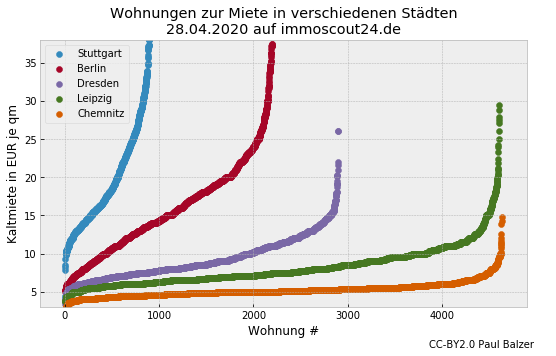

In [11]:
plt.figure(figsize=(8,5))

f = 1
plt.scatter(x=stuttgart.index[::f], y=stuttgart['EUR/qm'][::f], label='Stuttgart')
plt.scatter(x=berlin.index[::f], y=berlin['EUR/qm'][::f], label='Berlin')
plt.scatter(x=dresden.index[::f], y=dresden['EUR/qm'][::f], label='Dresden')
plt.scatter(x=leipzig.index[::f], y=leipzig['EUR/qm'][::f], label='Leipzig')
plt.scatter(x=chemnitz.index[::f], y=chemnitz['EUR/qm'][::f], label='Chemnitz')

plt.xlabel('Wohnung #')
plt.ylabel('Kaltmiete in EUR je qm')
plt.title('Wohnungen zur Miete in verschiedenen Städten\n28.04.2020 auf immoscout24.de')
plt.legend(loc=2)
plt.ylim([3,38])

plt.annotate('CC-BY2.0 Paul Balzer', xy=(0.96,.025), xycoords='figure fraction', ha='right')

plt.tight_layout()

plt.savefig('2020-05-28-Stuttgart-Berlin-Chemnitz-Leipzig-Dresden-Wohnung-Miete-EUR-qm.png', dpi=150)

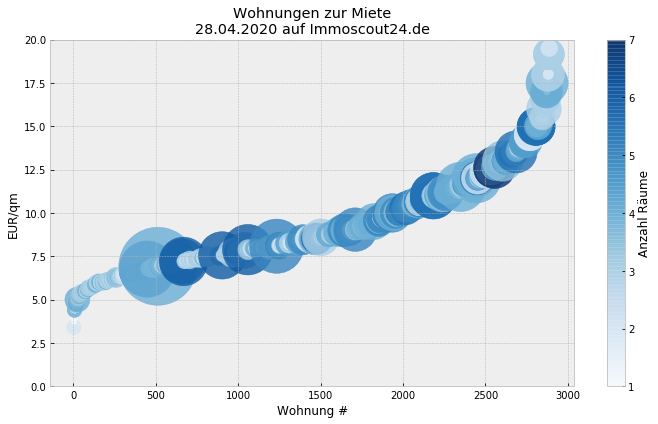

In [12]:
plt.figure(figsize=(10,6))

f = 1
plt.scatter(x=dresden.index[::f], y=dresden['EUR/qm'][::f],
            c=dresden['numberOfRooms'][::f], s=(dresden['livingSpace'][::f]*0.2)**2,
            label='Dresden', alpha=0.8, cmap='Blues')

plt.colorbar(label='Anzahl Räume')
plt.xlabel('Wohnung #')
plt.ylabel('EUR/qm')
plt.title('Wohnungen zur Miete\n28.04.2020 auf Immoscout24.de')
#plt.legend()
plt.ylim([0,20])

plt.tight_layout()

plt.savefig('2020-05-28-Sachsen-Dresden-Wohnung-Miete-EUR-qm.png', dpi=150)

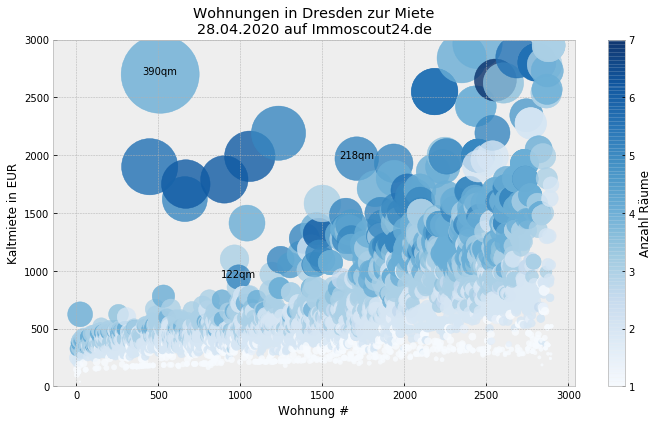

In [13]:
plt.figure(figsize=(10,6))

f = 1
plt.scatter(x=dresden.index[::f], y=dresden['price'][::f],
            c=dresden['numberOfRooms'][::f], s=(dresden['livingSpace'][::f]*0.2)**2,
            label='Dresden', alpha=0.8, cmap='Blues')

for i in [512, 989, 1710]:
    plt.annotate(str(int(dresden.loc[i, 'livingSpace'])) + 'qm',
                 xy=(i, dresden.loc[i, 'price']), ha='center')

plt.colorbar(label='Anzahl Räume')
plt.xlabel('Wohnung #')
plt.ylabel('Kaltmiete in EUR')
plt.title('Wohnungen in Dresden zur Miete\n28.04.2020 auf Immoscout24.de')
#plt.legend()
plt.ylim([0,3000])

plt.tight_layout()

plt.savefig('2020-05-28-Sachsen-Dresden-Wohnung-Miete-EUR.png', dpi=150)

## Stadtteile Dresden

In [ ]:
with open('./stadtteile-Dresden.json') as data_file:    
    stadtteil_json = json.load(data_file)

In [ ]:
stadtteile_osm = []
for i, stadtteil in enumerate(stadtteil_json['features']):
    try:
        stadtteilname = stadtteil['properties']['name']
        stadtteile_osm.append(stadtteilname)
    except:
        continue
        
stadtteile_osm.sort()

In [ ]:
stadtteile_osm

## Postleitzahlen Dresden

In [ ]:
plzs = "01057,01067,01069,01097,01099,01108,01109,01127,01129,01139,01156,01157,01159,01169,01187,01189,01217,01219,01227,01237,01239,01257,01259,01277,01279,01307,01309,01312,01324,01326,01327,01328,01329,01462,01465,01728"

In [ ]:
ddplzs = plzs.split(',')

### QGIS Filter output

In [ ]:
for plz in ddplzs:
    print('"plz" LIKE "%s" OR' % plz.strip())

## Daten lesen

In [ ]:
data = pd.read_csv('2015-08-09-17-49-immo-komplett.csv', encoding='utf-8', dtype={'PLZ': str})

In [ ]:
data.index = data.ID

In [ ]:
data.head()

## Daten Cleanen

### Preise cleanen

In [ ]:
def preiscleaner(preis, mio=False):
    #print preis
    try:
        p = preis.split()
        p = float(p[0].replace('.', '').replace(',','.'))
        if mio:
            return p/1e6
        else:
            return int(p)
    except:
        return preis

In [ ]:
data['Kaufpreis'] = data['Kaufpreis'].apply(preiscleaner, mio=True)
data['Kaltmiete'] = data['Kaltmiete'].apply(preiscleaner)

### Flächen cleanen

In [ ]:
def squaremetercleaner(squaremeter):
    #print squaremeter
    try:
        m = squaremeter.split()
        m = float(m[0].replace(',', '.'))
        return int(m)
    except:
        return 0.0    

In [ ]:
data[u'Wohnfläche'] = data[u'Wohnfläche'].apply(squaremetercleaner)

### Zimmeranzahl

In [ ]:
data[u'Zimmer'] = data[u'Zimmer'].str.replace(',','.').astype('float')

In [ ]:
data.head()

## Verkaufsvolumen

In [ ]:
verkaufgroup = data[data['Miete/Kauf']=='Kauf'].groupby('From').sum()

In [ ]:
verkaufgroup.sort('Kaufpreis', ascending=True, inplace=True)
verkaufgroup['Kaufpreis'].dropna(inplace=True)

In [ ]:
verkaufgroup['Kaufpreis'].tail(10)

In [ ]:
verkaufgroup['Kaufpreis'][-10:].plot(kind='barh', title='Volumen Kauf-Immobilien in Dresden, Gruppiert nach Anbieter')

plt.xlabel(u'mio €')
plt.tight_layout()
plt.savefig('Groupby-Anbieter-KaufpreisSumme.png', dpi=150)

## Anzahl an Immobilien

In [ ]:
fromgroup = data.groupby(['From','Miete/Kauf']).count()

In [ ]:
fromgroup.sort('ID', ascending=True, inplace=True)

In [ ]:
fromgroup['ID'][-10:].plot(kind='barh', title='Angebotene Immobilien in Dresden, Gruppiert nach Anbieter')

plt.xlabel('Anzahl')
plt.tight_layout()
plt.savefig('Groupby-Anbieter.png', dpi=150)

# Immopreis Predictor

In [ ]:
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

In [ ]:
mietwohnungen = data[(data['Miete/Kauf']=='Miete') & (data['Haus/Wohnung']=='Wohnung')]
kaufwohnungen = data[(data['Miete/Kauf']=='Kauf') & (data['Haus/Wohnung']=='Wohnung')]

Kaltmieten über 5000€ sind unrealistisch und sind Fehler bei Eingabe auf immoscout24.de (Kauf statt Miete), die werfen wir raus.

In [ ]:
mietwohnungen = mietwohnungen[mietwohnungen.Kaltmiete < 5000.0]

## Verkaufspreis schätzen

In [ ]:
X = pd.concat([kaufwohnungen[[u'Wohnfläche', u'Zimmer']], pd.get_dummies(kaufwohnungen[u'Stadtteil'])], axis=1)
y = kaufwohnungen['Kaufpreis']

In [ ]:
# Robustly fit linear model with RANSAC algorithm
regressor = linear_model.RANSACRegressor(linear_model.LinearRegression())

In [ ]:
regressor.fit(X,y)

In [ ]:
inlier_mask = regressor.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

In [ ]:
y_pred = regressor.predict(X)
kaufwohnungen[u'Kaufpreis (geschätzt)'] = y_pred

In [ ]:
r2_ransac = r2_score(y[inlier_mask], y_pred[inlier_mask])

In [ ]:
sns.regplot(kaufwohnungen['Kaufpreis'][inlier_mask],
            kaufwohnungen[u'Kaufpreis (geschätzt)'][inlier_mask])
plt.scatter(kaufwohnungen['Kaufpreis'][outlier_mask],
            kaufwohnungen[u'Kaufpreis (geschätzt)'][outlier_mask],
            alpha=0.4,
            c='r')

plt.title(u'Schätzung des Kaufpreises (in mio €) von Eigentumswohnungen in Dresden\n(Stadtteil, Anzahl Zimmer, Wohnfläche)')
plt.text(0.85, 0.95, r'$R^2=%.2f$' % r2_ransac)
plt.xlim(0, 1.1)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('LinReg-Kauf-Wohnung.png', dpi=150)

In [ ]:
X.columns[2:]

In [ ]:
len(stadtteile)

In [ ]:
# Immoscout Datensatz durch gehen und schauen,
# ob die Stadtteile auch den Namen der offiziellen
# Stadtteile tragen
for stadtteil in X.columns[2:]:
    # Da bei einigen nur der Beginn der Namen gleich ist,
    # müssen wir leider alle durch gehen :)
    
    
    
    print(u'✓ %s' % (stadtteil))     

In [ ]:
X.columns

In [ ]:
sum(X[u'Äußere Neustadt (Antonstadt)'])

In [ ]:
X_my = np.zeros(103)
X_my[0] = 121.0
X_my[1] = 3.0
X_my[-1] = 1

In [ ]:
y_my = regressor.predict(X_my)[0][0]

In [ ]:
print('Geschätzter Marktwert: %.3f€' % (1000.0*y_my))

## Kaltmiete schätzen

### Nur mit Wohnfläche und Anzahl der Zimmer

In [ ]:
X = mietwohnungen[[u'Wohnfläche', u'Zimmer']]
y = mietwohnungen['Kaltmiete']

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(X, y)

In [ ]:
y_pred = reg.predict(X)

In [ ]:
mietwohnungen[u'Kaltmiete geschätzt'] = y_pred

In [ ]:
r_2 = r2_score(y, y_pred)

In [ ]:
sns.regplot(mietwohnungen['Kaltmiete'] ,mietwohnungen[u'Kaltmiete geschätzt'])
plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_2)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

### Vorhersage

In [ ]:
m = 155 # m2
z = 4  # Zimmer
print('Kaltmiete für %iR-Wohnung %im^2 in Dresden: %i€' % (z, m, reg.predict([m, z])))

In [ ]:
for z in range(2, 6):
    for m in range(40, 200, 10):
        print('Kaltmiete für %iR-Wohnung %im^2 in Dresden: %i€' % (z, m, reg.predict([m, z])))

### Zusätzlich noch Lage (Postleitzahl)

In [ ]:
X2 = pd.concat([X, pd.get_dummies(mietwohnungen[u'PLZ'])], axis=1)

In [ ]:
reg2 = linear_model.LinearRegression()

In [ ]:
reg2.fit(X2, y)

In [ ]:
y2_pred = reg2.predict(X2)

In [ ]:
mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'] = y2_pred

In [ ]:
r_22 = r2_score(y, y2_pred)

In [ ]:
sns.regplot(mietwohnungen['Kaltmiete'] ,mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'])
plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Lage, Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_22)
plt.xlim(0, 3000)
plt.ylim(0, 3000)

## Outlier detection

In [ ]:
# Robustly fit linear model with RANSAC algorithm
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(), residual_threshold=250.0)

In [ ]:
model_ransac.fit(X2, y)

In [ ]:
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
print(u'%.1f%% der Wohnungen als Ausreißer identifiziert' % (sum(outlier_mask)*100.0/(sum(outlier_mask)+sum(inlier_mask))))

In [ ]:
y2_pred_ransac = model_ransac.predict(X2)

In [ ]:
mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'] = y2_pred_ransac.astype('int')

In [ ]:
r_22_ransac = r2_score(y[inlier_mask], y2_pred_ransac[inlier_mask])

In [ ]:
sns.regplot(mietwohnungen['Kaltmiete'][inlier_mask],
            mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'][inlier_mask])
plt.scatter(mietwohnungen['Kaltmiete'][outlier_mask],
            mietwohnungen[u'Kaltmiete geschätzt (mit Lage)'][outlier_mask],
            alpha=0.1,
            c='r')

plt.title(u'Schätzung der Kaltmiete von Mietwohnungen in Dresden\n(Lage, Anzahl Zimmer, Fläche)')
plt.text(2600, 2100, r'$R^2=%.2f$' % r_22_ransac)
plt.xlim(0, 3000)
plt.ylim(0, 3000)
plt.tight_layout()
plt.savefig('LinReg.png', dpi=150)

## Vorhersage für alle Postleitzahlen

### Datencheck: Sind alle PLZ vorhanden?

In [ ]:
len(X2.columns[2:]) == len(ddplzs)

In [ ]:
for plz in X2.columns[2:]:
    if plz in ddplzs:
        print(u'%s ✓' % plz)
    else:
        print(u'%s ✗' % plz)

In [ ]:
X2.head(1)

### Prediction

In [ ]:
for raum in range(2, 6):
    kaltmietenDD = pd.DataFrame()
    A = pd.Series(raum*25.0 * np.ones(len(ddplzs)))
    Z = pd.Series(raum * np.ones(len(ddplzs)))

    X_pred = pd.concat([A, Z, pd.get_dummies(ddplzs)], axis=1)

    kaltmieten = model_ransac.predict(X_pred)

    kaltmietenDD = pd.DataFrame(data={'Wohnfläche': A, 'Zimmer': Z, 'PLZ': ddplzs, 'Kaltmiete': kaltmieten.flatten()})

    kaltmietenDD['KaltmieteProQm'] = kaltmietenDD['Kaltmiete'] / kaltmietenDD['Wohnfläche']

    kaltmietenDD[['PLZ', 'KaltmieteProQm']].to_csv('Kaltmieten%sR.csv' % raum, index=False, float_format='%.2f')

In [ ]:
kaltmietenDD.head()

## Top 10 günstige Wohnungen finden

In [ ]:
mietwohnungen[u'Differenz zur Schätzung'] = mietwohnungen[u'Kaltmiete'] - mietwohnungen[u'Kaltmiete geschätzt (mit Lage)']

In [ ]:
topmietwohnungen = mietwohnungen.sort(u'Differenz zur Schätzung')

### 3 Raum

In [ ]:
topmietwohnungen[topmietwohnungen['Zimmer']==3][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

### 4 Raum

In [ ]:
topmietwohnungen[topmietwohnungen['Zimmer']==4][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

### 5 Raum

In [ ]:
topmietwohnungen[topmietwohnungen['Zimmer']==5][['Titel', u'Wohnfläche', 'Kaltmiete', u'Differenz zur Schätzung', 'Stadtteil', 'Zimmer']].head(10)

Fragen? @Balzer82